## 介绍  
参考教程https://liam0205.me/2014/09/11/matplotlib-tutorial-zh-cn/  
Matplotlib 可能是 Python 2D-绘图领域使用最广泛的套件。它能让使用者很轻松地将数据图形化，并且提供多样化的输出格式。这里将会探索 matplotlib 的常见用法

## 初级绘制    
pylab 是 matplotlib 面向对象绘图库的一个接口。它的语法和 Matlab 十分相近。也就是说，它主要的绘图命令和 Matlab 对应的命令有相似的参数。

In [1]:
from pylab import *
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

### 使用默认配置

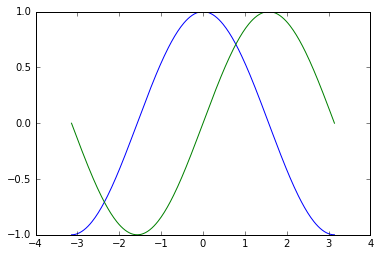

In [2]:
plot(X, C)
plot(X, S)
show()

Matplotlib 的默认配置都允许用户自定义。你可以调整大多数的默认配置：图片大小和分辨率（dpi）、线宽、颜色、风格、坐标轴、坐标轴以及网格的属性、文字与字体属性等。不过，matplotlib 的默认配置在大多数情况下已经做得足够好，你可能只在很少的情况下才会想更改这些默认配置  
下面的代码中，我们展现了 matplotlib 的默认配置并辅以注释说明，这部分配置包含了有关绘图样式的所有配置。代码中的配置与默认配置完全相同，你可以在交互模式中修改其中的值来观察效果

### 改变线条的颜色和粗细  
首先，我们以蓝色和红色分别表示余弦和正弦函数，而后将线条变粗一点。接下来，我们在水平方向拉伸一下整个图

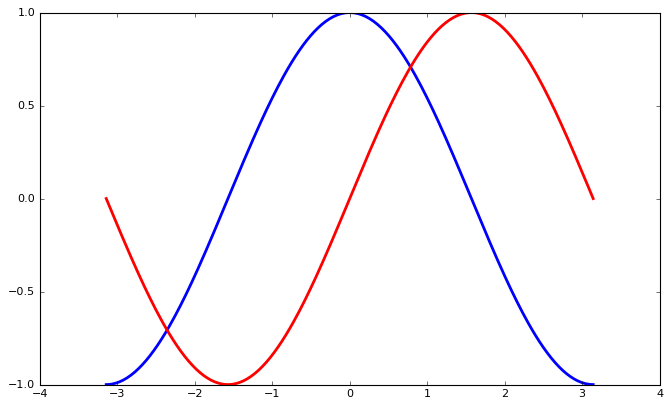

In [3]:
## 创建一个10 * 6 点（point）的图，并设置分辨率为 80
figure(figsize=(10, 6), dpi = 80)
plot(X, C, color='blue', linewidth=2.5, linestyle='-')
plot(X, S, color='red', linewidth=2.5, linestyle='-')
show()

### 设置图片边界  
当前的图片边界设置得不好，所以有些地方看得不是很清楚。

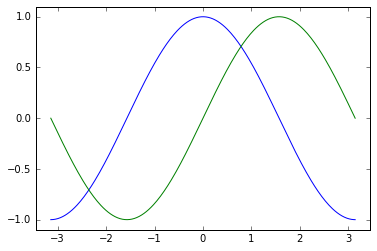

In [4]:
xlim(X.min()*1.1, X.max()*1.1)
ylim(C.min()*1.1, C.max()*1.1)
plot(X, C)
plot(X, S)
show()

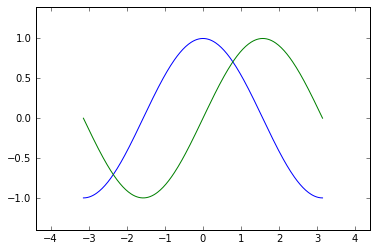

In [8]:
xmin, xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
xlim(xmin - dx, xmax + dx)
ylim(ymin - dy, ymax + dy)
plot(X, C)
plot(X, S)
show()

### 设置记号  
我们讨论正弦和余弦函数的时候，通常希望知道函数在 ±π 和 ±π2 的值。这样看来，当前的设置就不那么理想了

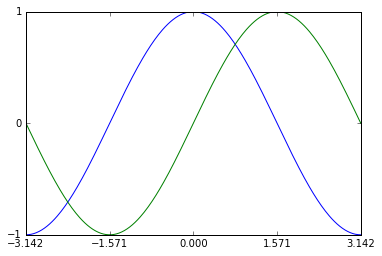

In [9]:
xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
yticks([-1, 0, +1])
plot(X, C)
plot(X, S)
show()

### 设置记号的标签  
记号现在没问题了，不过标签却不大符合期望。我们可以把 3.142 当做是 π，但毕竟不够精确。当我们设置记号的时候，我们可以同时设置记号的标签。注意这里使用了 LaTeX

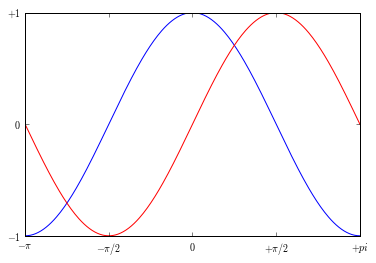

In [10]:
xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+pi$'])
yticks([-1, 0, 1], [r'$-1$', r'$0$', r'$+1$'])
plot(X, C, color='blue')
plot(X, S, color='red')
show()

### 移动脊柱  
坐标轴线和上面的记号连在一起就形成了脊柱（Spines，一条线段上有一系列的凸起，是不是很像脊柱骨啊~），它记录了数据区域的范围。它们可以放在任意位置，不过至今为止，我们都把它放在图的四边。  
实际上每幅图有四条脊柱（上下左右），为了将脊柱放在图的中间，我们必须将其中的两条（上和右）设置为无色，然后调整剩下的两条到合适的位置——数据空间的 0 点。

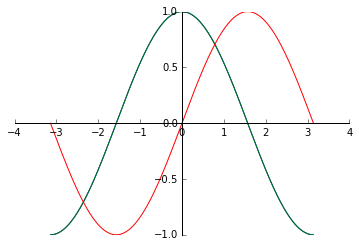

In [13]:
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plot(X, C)
plot(X, S)
show()

### 添加图例  
我们在图的左上角添加一个图例。为此，我们只需要在 plot 函数里以「键 - 值」的形式增加一个参数

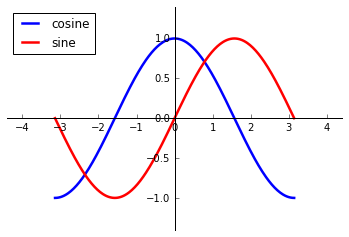

In [19]:
xmin, xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
xlim(xmin - dx, xmax + dx)
ylim(ymin - dy, ymax + dy)
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plot(X, C, color='blue', linewidth=2.5, linestyle='-', label='cosine')
plot(X, S, color='red', linewidth=2.5, linestyle='-', label='sine')
legend(loc='upper left')
show()

### 给一些特殊点做注释  
我们希望在 2π/3 的位置给两条函数曲线加上一个注释。首先，我们在对应的函数图像位置上画一个点；然后，向横轴引一条垂线，以虚线标记；最后，写上标签

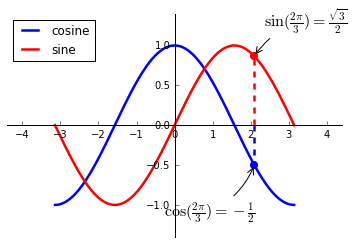

In [34]:
t = 2*np.pi/3
plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle='--')
scatter([t, ], [np.cos(t), ], 50, color='blue')

annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',\
         xy=(t, np.sin(t)), xycoords='data', \
         xytext=(+10, +30), textcoords='offset points',fontsize=16,\
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=.2'))

plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")
scatter([t,],[np.sin(t),], 50, color ='red')
annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',\
         xy=(t, np.cos(t)), xycoords='data',\
         xytext=(-90, -50), textcoords='offset points',\
         fontsize=16,arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
xmin, xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
xlim(xmin - dx, xmax + dx)
ylim(ymin - dy, ymax + dy)
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plot(X, C, color='blue', linewidth=2.5, linestyle='-', label='cosine')
plot(X, S, color='red', linewidth=2.5, linestyle='-', label='sine')
legend(loc='upper left')
show()

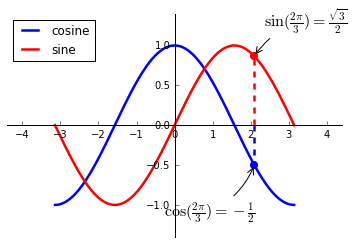

In [28]:
t = 2*np.pi/3
plot([t,t],[0,np.cos(t)], color ='blue', linewidth=2.5, linestyle="--")
scatter([t,],[np.cos(t),], 50, color ='blue')



plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")
scatter([t,],[np.sin(t),], 50, color ='red')

annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
         xy=(t, np.cos(t)), xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

xmin, xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
xlim(xmin - dx, xmax + dx)
ylim(ymin - dy, ymax + dy)
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plot(X, C, color='blue', linewidth=2.5, linestyle='-', label='cosine')
plot(X, S, color='red', linewidth=2.5, linestyle='-', label='sine')
legend(loc='upper left')
show()

## 图像、子图、坐标轴和记号  
到目前为止，我们都用隐式的方法来绘制图像和坐标轴。快速绘图中，这是很方便的。我们也可以显式地控制图像、子图、坐标轴。Matplotlib 中的「图像」指的是用户界面看到的整个窗口内容。在图像里面有所谓「子图」。子图的位置是由坐标网格确定的，而「坐标轴」却不受此限制，可以放在图像的任意位置。我们已经隐式地使用过图像和子图：当我们调用 plot 函数的时候，matplotlib 调用 gca() 函数以及 gcf() 函数来获取当前的坐标轴和图像；如果无法获取图像，则会调用 figure() 函数来创建一个——严格地说，是用 subplot(1,1,1) 创建一个只有一个子图的图像。

### 图像  
所谓「图像」就是 GUI 里以「Figure #」为标题的那些窗口。图像编号从 1 开始，与 MATLAB 的风格一致，而于 Python 从 0 开始编号的风格不同。以下参数是图像的属性：  


参数	|默认值	|描述
:- |:- |:-
num	|1	|图像的数量
figsize	|figure.figsize	|图像的长和宽（英寸）
dpi	|figure.dpi	|分辨率（点/英寸）
facecolor	|figure.facecolor	|绘图区域的背景颜色
edgecolor	|figure.edgecolor	|绘图区域边缘的颜色
frameon	|True	|是否绘制图像边缘

这些默认值可以在源文件中指明。不过除了图像数量这个参数，其余的参数都很少修改。  
你在图形界面中可以按下右上角的 X 来关闭窗口（OS X 系统是左上角）。Matplotlib 也提供了名为 close 的函数来关闭这个窗口。close 函数的具体行为取决于你提供的参数：  
1.不传递参数：关闭当前窗口；  
2.传递窗口编号或窗口实例（instance）作为参数：关闭指定的窗口；  
3.all：关闭所有窗口。  
和其他对象一样，你可以使用 setp 或者是 set_something 这样的方法来设置图像的属性

### 子图  
你可以用子图来将图样（plot）放在均匀的坐标网格中。用 subplot 函数的时候，你需要指明网格的行列数量，以及你希望将图样放在哪一个网格区域中。此外，gridspec 的功能更强大，你也可以选择它来实现这个功能。

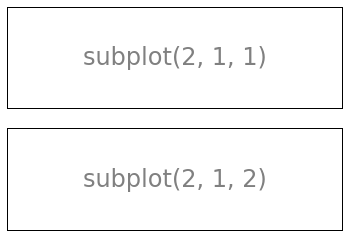

In [6]:
from pylab import *
subplot(2, 1, 1)
xticks([]), yticks([])#坐标轴不可见
text(0.5, 0.5, 'subplot(2, 1, 1)', ha='center', va='center', size=24, alpha=.5)
subplot(2, 1, 2)
xticks([]), yticks([])
text(0.5, 0.5, 'subplot(2, 1, 2)', ha='center', va='center', size=24, alpha=.5)
plt.savefig('./subplot-horizontal.png', dpi=64)
show()

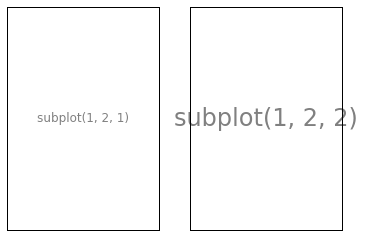

In [8]:
subplot(1, 2, 1)
xticks([]), yticks([])
text(0.5, 0.5, 'subplot(1, 2, 1)', ha='center', va='center', size=12, alpha=.5)
subplot(1, 2, 2)
xticks([]), yticks([])
text(0.5, 0.5, 'subplot(1, 2, 2)', ha='center', va='center', size=24, alpha=.5)
show()

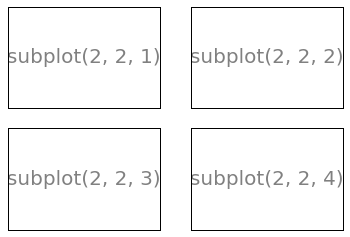

In [9]:
subplot(2, 2, 1)
xticks([]), yticks([])
text(0.5, 0.5, 'subplot(2, 2, 1)', ha='center', va='center', size=20, alpha=.5)
subplot(2, 2, 2)
xticks([]), yticks([])
text(0.5, 0.5, 'subplot(2, 2, 2)', ha='center', va='center', size=20, alpha=.5)
subplot(2, 2, 3)
xticks([]), yticks([])
text(0.5, 0.5, 'subplot(2, 2, 3)', ha='center', va='center', size=20, alpha=.5)
subplot(2, 2, 4)
xticks([]), yticks([])
text(0.5, 0.5, 'subplot(2, 2, 4)', ha='center', va='center', size=20, alpha=.5)
show()

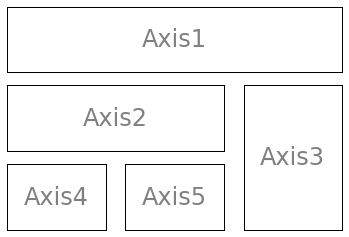

In [11]:
import matplotlib.gridspec as gridspec

G = gridspec.GridSpec(3, 3)
'''
使用plt.subplot来作图,
gs[0, :]表示这个图占第0行和所有列, 
gs[1, :2]表示这个图占第1行和第2列前的所有列,
gs[1:, 2]表示这个图占第1行后的所有行和第2列, 
gs[-1, 0]表示这个图占倒数第1行和第0列, 
gs[-1, -2]表示这个图占倒数第1行和倒数第2列.
'''
axes_1 = subplot(G[0, :])
xticks([]), yticks([])
text(0.5, 0.5, 'Axis1', ha='center', va='center', size=24, alpha=.5)
axes_2 = subplot(G[1, :-1])
xticks([]), yticks([])
text(0.5, 0.5, 'Axis2', ha='center', va='center', size=24, alpha=.5)
axes_3 = subplot(G[1:, -1])
xticks([]), yticks([])
text(0.5, 0.5, 'Axis3', ha='center', va='center', size=24, alpha=.5)
axes_4 = subplot(G[-1, 0])
xticks([]), yticks([])
text(0.5, 0.5, 'Axis4', ha='center', va='center', size=24, alpha=.5)
axes_5 = subplot(G[-1, -2])
xticks([]), yticks([])
text(0.5, 0.5, 'Axis5', ha='center', va='center', size=24, alpha=.5)
show()

### 坐标轴  

坐标轴和子图功能类似，不过它可以放在图像的任意位置。因此，如果你希望在一副图中绘制一个小图，就可以用这个功能

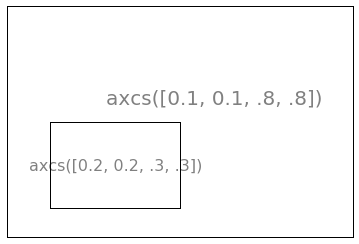

In [5]:
from pylab import *

axes([0.1, 0.1, .8, .8])
#axes([x,y,xs,ys])#其中x代表在X轴的位置，y代表在Y轴的位置，xs代表在X轴上向右延展的范围大小，yx代表在Y轴中向上延展的范围大小
xticks([]), yticks([])
text(0.6, 0.6, 'axcs([0.1, 0.1, .8, .8])', ha='center', va='center', size=20, alpha=.5)
# 第一个参数是x轴坐标  
# 第二个参数是y轴坐标  
# 第三个参数是要显式的内容  
# alpha 设置字体的透明度  
# family 设置字体  
# size 设置字体的大小  
# style 设置字体的风格  
# wight 字体的粗细  
# bbox 给字体添加框，alpha 设置框体的透明度， facecolor 设置框体的颜色
axes([0.2, 0.2, .3, .3])
xticks([]), yticks([])
text(0.5, 0.5, 'axcs([0.2, 0.2, .3, .3])', ha='center', va='center', size=16, alpha=.5)
show()

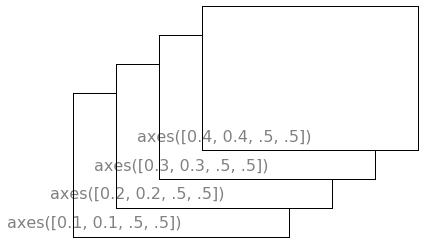

In [4]:
from pylab import *
axes([0.1, 0.1, .5, .5])
xticks([]), yticks([])
text(0.1, 0.1, 'axes([0.1, 0.1, .5, .5])', ha='center', va='center', size=16, alpha=.5)
axes([0.2, 0.2, .5, .5])
xticks([]), yticks([])
text(0.1, 0.1, 'axes([0.2, 0.2, .5, .5])', ha='center', va='center', size=16, alpha=.5)
axes([0.3, 0.3, .5, .5])
xticks([]), yticks([])
text(0.1, 0.1, 'axes([0.3, 0.3, .5, .5])', ha='center', va='center', size=16, alpha=.5)
axes([0.4, 0.4, .5, .5])
xticks([]), yticks([])
text(0.1, 0.1, 'axes([0.4, 0.4, .5, .5])', ha='center', va='center', size=16, alpha=.5)
show()

## 记号

良好的记号是图像的重要组成部分。Matplotlib 里的记号系统里的各个细节都是可以由用户个性化配置的。你可以用 Tick Locators 来指定在那些位置放置记号，用 Tick Formatters 来调整记号的样式。主要和次要的记号可以以不同的方式呈现。默认情况下，每一个次要的记号都是隐藏的，也就是说，默认情况下的次要记号列表是空的——NullLocator

### Tick Locators  
下面有为不同需求设计的一些 Locators

这些 Locators 都是 matplotlib.ticker.Locator 的子类，你可以据此定义自己的 Locator。以日期为 ticks 特别复杂，因此 Matplotlib 提供了 matplotlib.dates 来实现这一功能

## 其他类型的图

### 普通图

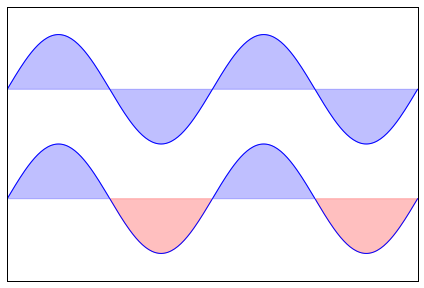

In [12]:
from pylab import *
n = 256
X = np.linspace(-np.pi, np.pi, n , endpoint = True)
Y = np.sin(2*X)

plt.axes([0.025,0.025,0.95,0.95])
plot(X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y+1, color='blue', alpha=.25)

plot(X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y-1, (Y-1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y-1, (Y-1) < -1, color='red',  alpha=.25)

plt.xlim(-np.pi,np.pi), plt.xticks([])
plt.ylim(-2.5,2.5), plt.yticks([])
show()

### 散点图

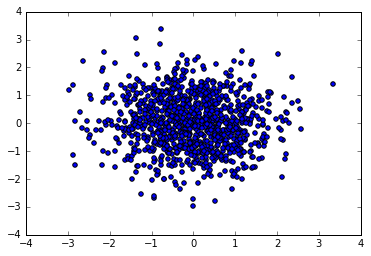

In [7]:
from pylab import *
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
#T = np.arctan2(Y, X)

#plt.axes([0.025, 0.025, 0.95, 0.95])
scatter(X, Y)
show()

### 条形图

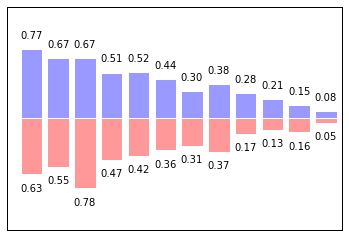

In [7]:
from pylab import *

n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5, 1.0, n)

bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    text(x+0.4, y+0.1, '%.2f' % y, ha='center', va='bottom')
for x, y in zip(X, Y2):
    text(x+0.4, -y-0.1, '%.2f' % y, ha='center', va='top')
xticks([]), yticks([])
ylim(-1.25, +1.25)
xlim(-.5, n)
show()